# Performance of CITE-seq antibodies

- In this notebook density plots are generated from CLR normalized ADT counts 
- For comparisons, signals of NK cell markers are compared between NK and B cells, and between NK cells and isotype controls (available for Neurips dataset).


### Dataset:
- Seurat

### Used NK cell markers are selected based on recent papers and documentation of Mustjoki group; 

- Pfefferle, A., et al. (2019). A Temporal Transcriptional Map of Human Natural Killer Cell Differentiation. BioRxiv, 630657. https://doi.org/10.1101/630657
- Melsen, J. E., et al. (2022). Single-cell transcriptomics in bone marrow delineates CD56dimGranzymeK+ subset as intermediate stage in NK cell differentiation. Frontiers in immunology, 13, 1044398. https://doi.org/10.3389/fimmu.2022.1044398
- Yang, C., et al.(2019). Heterogeneity of human bone marrow and blood natural killer cells defined by single-cell transcriptome. Nature communications, 10(1), 3931. https://doi.org/10.1038/s41467-019-11947-7



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=120, dpi_save=300, vector_friendly=True)

In [3]:
adata_seurat = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_seurat_norm.h5ad')

In [9]:
#Select only NK cells

seurat_nk = adata_seurat[(adata_seurat.obs['cell_type'] == "NK")]

In [10]:
seurat_nk_prot=seurat_nk.obsm['protein_expression_clr_seurat']


In [12]:
seurat_nk_prot.shape

(1226, 141)

In [13]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]


In [14]:
seurat_nk_prot.shape

(1226, 25)

## Comparisons

In [15]:
#Surface protein markers for NK cells

nk_all = ['CD52',
 'CD127',
 'CD226',
 'CD335',
 'CD195',
 'CD56',
 'CD5',
 'CD69'
 'CD94',
 'CD16',
 'CD122',
 'CD57',
 'CD38',
 'CD158e1',
 'CD34',
 'TIGIT',
 'CD314',
 'CD7',
 'CD62L',
 'CD2',
 'CD27',
 'CX3CR1',
 'CD161',
 'CD155',
 'CD158b']

In [16]:
adata_seurat.obs["cell_type"].unique().tolist()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [17]:
samples_s=adata_seurat.obs['POOL'].unique().tolist()
samples_s

['Seurat']

In [18]:
listOfmarkers= nk_all

nk_seurat= []

for x in listOfmarkers:
    if x in seurat_nk_prot.columns:
        nk_seurat.append(x)

In [19]:
nk_seurat

['CD127', 'CD56', 'CD16', 'CD57', 'CD38', 'CD34', 'CD27', 'CD161']

In [20]:
#saving NK markers from all samples into a list

list_samples_s=[]

for sample in samples_s:
    eg=adata_seurat[adata_seurat.obs['cell_type'] == 'NK']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_seurat']
    prot_marker=prot[nk_seurat]
    list_samples_s.append(prot_marker)

In [21]:
string= " NK cells"

samples_s = [x + string for x in samples_s]

In [22]:
list_seurat=[]

for i in range(len(list_samples_s)):
    sample= list_samples_s[i]
    sample["Sample"]=samples_s[i]
    list_seurat.append(sample)


In [23]:
df_all_s=pd.concat(list_seurat, axis=0)

In [24]:
df_all_s = df_all_s.T.drop_duplicates().T

In [25]:
samples_s=adata_seurat.obs['POOL'].unique().tolist()

In [26]:
samples_s

['Seurat']

In [27]:
#saving NK markers from all samples into a list, B cells

list_samples_s_b=[]

for sample in samples_s:
    eg=adata_seurat[adata_seurat.obs['cell_type'] == 'Naive B']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_seurat']
    prot_marker=prot[nk_seurat]
    list_samples_s_b.append(prot_marker)

In [28]:
string= " B cells"

samples_s_b = [x + string for x in samples_s]

In [29]:
list_seurat_b=[]

for i in range(len(list_samples_s_b)):
    sample= list_samples_s_b[i]
    sample["Sample"]=samples_s_b[i]
    list_seurat_b.append(sample)

#creating df

df_all_s_b=pd.concat(list_seurat_b, axis=0)

In [30]:
#combining NK + B cell df

df=pd.concat([df_all_s, df_all_s_b], axis=0)

In [31]:
cdf_seurat = df[(df['Sample'] == "Seurat NK cells") | (df['Sample'] == 'Seurat B cells')].assign(Samplepair= 1)   


In [32]:
cdf_seurat.columns

Index(['CD127', 'CD56', 'CD16', 'CD57', 'CD38', 'CD34', 'CD27', 'CD161',
       'Sample', 'Samplepair'],
      dtype='object')

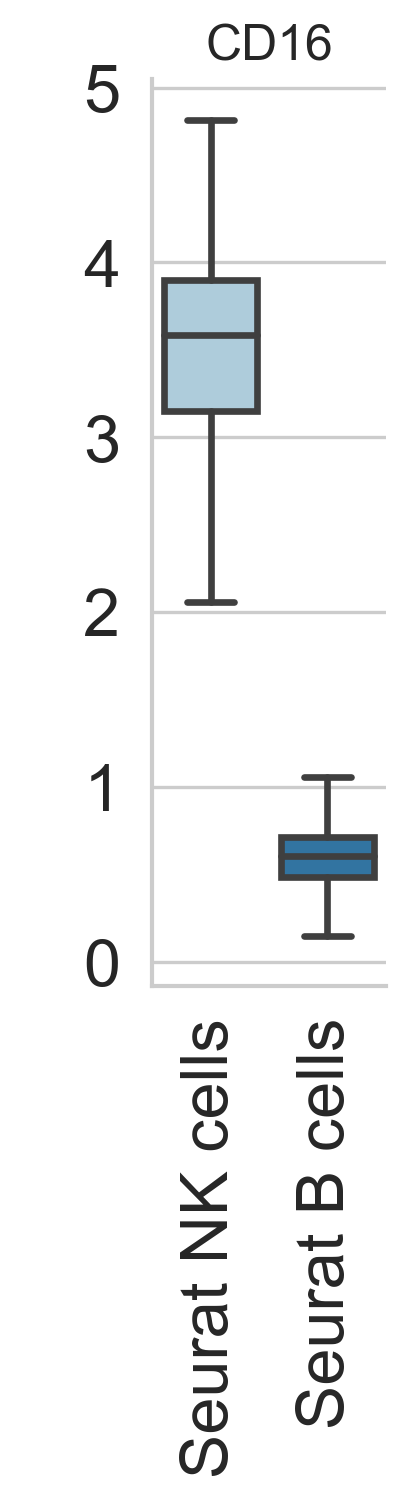

In [34]:
#CD16

sns.set_theme(style = "whitegrid", font_scale= 1.5)
ax = sns.catplot(x="Sample", y="CD16",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf_seurat,
                 linewidth = 2,
            legend = "CD16")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(5, 5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.title("CD16", fontsize=15)
ax.set(xlabel=None)
ax.set_ylabels(' ', fontsize= 15)
plt.show()

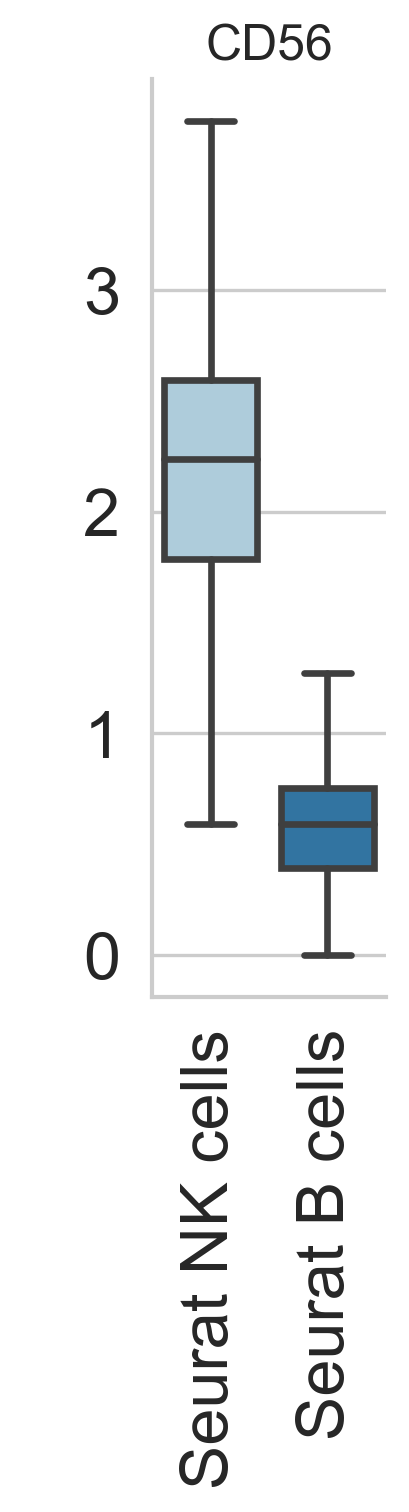

In [36]:
#CD56

sns.set_theme(style = "whitegrid", font_scale= 1.5)
ax = sns.catplot(x="Sample", y="CD56",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf_seurat,
                 linewidth = 2,
            legend = "CD56")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(5, 5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.title("CD56", fontsize=15)
ax.set(xlabel=None)
ax.set_ylabels(' ', fontsize= 15)
plt.show()

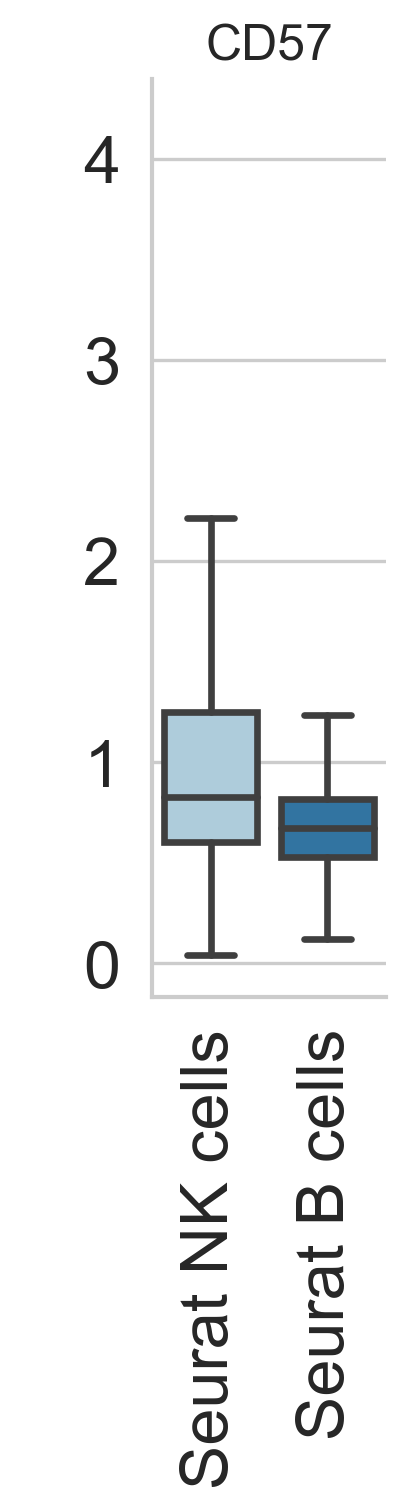

In [37]:
#CD57

sns.set_theme(style = "whitegrid", font_scale= 1.5)
ax = sns.catplot(x="Sample", y="CD57",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf_seurat,
                 linewidth = 2,
            legend = "CD57")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(5, 5)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.title("CD57", fontsize=15)
ax.set(xlabel=None)
ax.set_ylabels(' ', fontsize= 15)
plt.show()